In [12]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('MNIST/train.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.0

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.0

In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10 , 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10 , 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # Subtract max for numerical stability
    A = exp_Z / np.sum(exp_Z, axis=0, keepdims=True)
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y= np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0


def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

    

In [7]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range (iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1,db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2



In [8]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[8 8 8 ... 7 1 8] [7 9 9 ... 2 3 1]
Accuracy:  0.08882926829268292
Iteration:  10
[7 7 3 ... 3 1 8] [7 9 9 ... 2 3 1]
Accuracy:  0.13921951219512196
Iteration:  20
[7 7 3 ... 3 1 8] [7 9 9 ... 2 3 1]
Accuracy:  0.23621951219512194
Iteration:  30
[7 7 3 ... 3 1 8] [7 9 9 ... 2 3 1]
Accuracy:  0.30073170731707316
Iteration:  40
[7 7 3 ... 3 1 8] [7 9 9 ... 2 3 1]
Accuracy:  0.35224390243902437
Iteration:  50
[7 9 3 ... 3 1 8] [7 9 9 ... 2 3 1]
Accuracy:  0.40334146341463417
Iteration:  60
[9 9 8 ... 3 1 8] [7 9 9 ... 2 3 1]
Accuracy:  0.4534146341463415
Iteration:  70
[9 9 8 ... 3 1 9] [7 9 9 ... 2 3 1]
Accuracy:  0.49490243902439024
Iteration:  80
[9 9 8 ... 3 1 9] [7 9 9 ... 2 3 1]
Accuracy:  0.5278780487804878
Iteration:  90
[9 9 7 ... 3 1 1] [7 9 9 ... 2 3 1]
Accuracy:  0.5573170731707318
Iteration:  100
[9 9 7 ... 3 1 1] [7 9 9 ... 2 3 1]
Accuracy:  0.5824634146341463
Iteration:  110
[4 9 7 ... 3 1 1] [7 9 9 ... 2 3 1]
Accuracy:  0.6087073170731707
Iteration:  120
[4 9

In [9]:
# Test on validation set
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_test[:, index, None]
    prediction = make_predictions(X_test[:, index, None], W1, b1, W2, b2)
    label = Y_test[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [10]:
dev_predictions = make_predictions(X_test, W1, b1, W2, b2)
print("Test Accuracy: ", get_accuracy(dev_predictions, Y_test))

[0 2 9 8 9 6 1 7 4 2 6 2 4 7 9 0 8 3 9 0 1 4 0 5 7 6 8 5 7 6 1 8 9 5 8 6 1
 2 1 9 6 9 3 9 7 5 8 2 9 4 8 0 4 6 4 1 4 2 7 2 2 6 6 4 5 3 3 1 5 1 7 1 1 7
 0 3 0 2 9 8 5 6 4 1 8 6 3 1 2 2 8 2 0 3 7 1 0 3 7 8 9 6 5 3 1 1 7 0 9 8 3
 2 7 0 8 7 2 9 5 1 2 5 7 1 2 2 1 1 4 1 3 0 6 0 7 3 9 9 2 1 5 5 9 1 6 9 9 7
 1 4 8 3 8 9 6 0 6 6 2 0 5 4 7 4 8 8 6 6 2 7 3 5 1 1 6 9 2 7 8 1 8 7 0 9 8
 9 6 8 2 1 1 7 4 2 6 1 1 7 8 6 0 7 8 7 9 5 5 2 9 8 6 8 1 7 0 2 3 1 5 5 5 8
 0 3 2 7 8 0 0 8 8 9 4 5 6 9 6 5 9 6 6 2 9 2 9 2 2 6 6 2 1 2 5 4 9 2 3 9 6
 8 5 3 2 3 3 1 6 8 5 0 6 0 1 5 4 4 6 9 1 1 6 0 7 9 0 8 6 6 1 1 4 7 3 1 9 3
 6 5 5 6 3 8 9 9 1 9 2 1 1 9 3 0 2 0 8 5 4 9 4 8 4 2 1 3 6 1 2 0 0 5 3 9 9
 1 9 4 3 3 1 0 3 0 9 3 5 1 7 9 0 3 4 7 7 9 9 7 8 3 5 2 0 9 8 9 7 7 0 8 4 8
 0 9 4 2 2 1 6 2 6 2 9 8 0 9 4 8 8 4 9 2 0 3 1 9 0 6 7 0 2 9 8 1 2 5 0 1 3
 4 1 2 3 6 7 0 3 4 6 6 3 5 6 5 6 2 1 3 9 3 4 3 9 8 9 4 3 6 5 2 3 5 1 5 3 7
 8 6 4 5 6 9 2 1 6 6 1 9 7 0 4 5 6 4 5 9 1 3 2 3 9 6 6 9 9 6 0 7 5 0 6 6 7
 6 1 0 2 1 5 8 2 2 3 5 8 

Prediction:  [0]
Label:  0


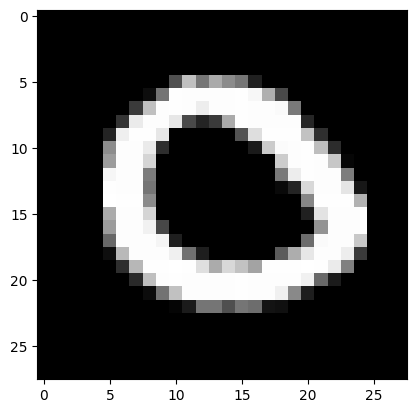

Prediction:  [2]
Label:  2


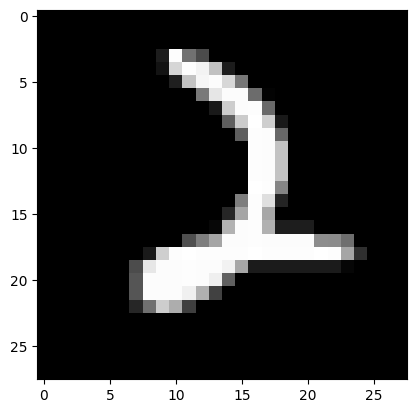

Prediction:  [9]
Label:  9


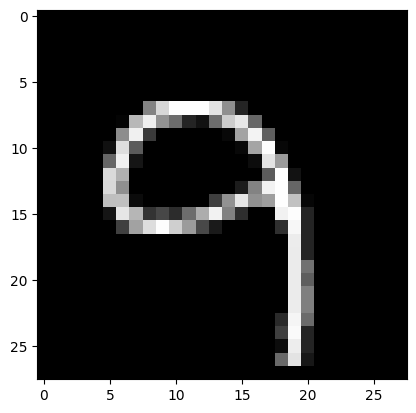

Prediction:  [8]
Label:  3


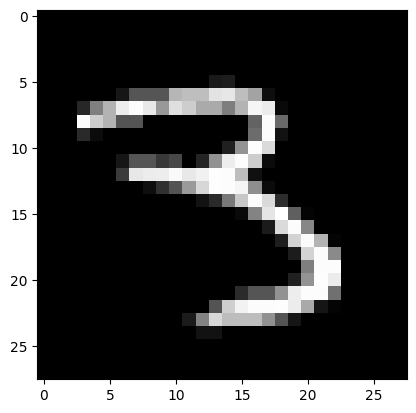

Prediction:  [2]
Label:  2


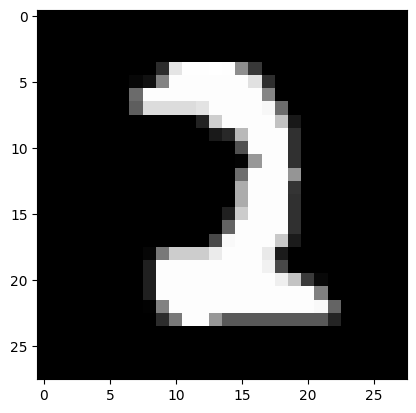

Prediction:  [6]
Label:  6


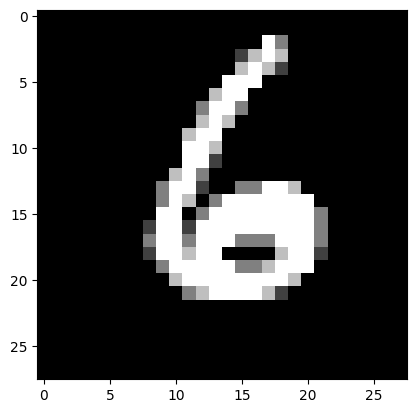

Prediction:  [0]
Label:  0


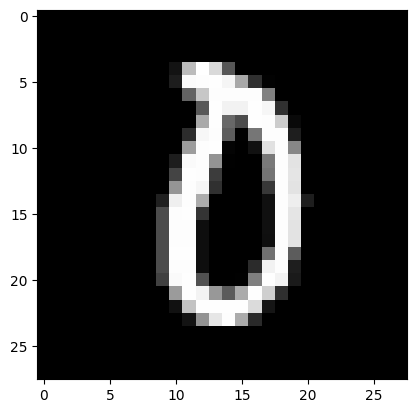

Prediction:  [8]
Label:  8


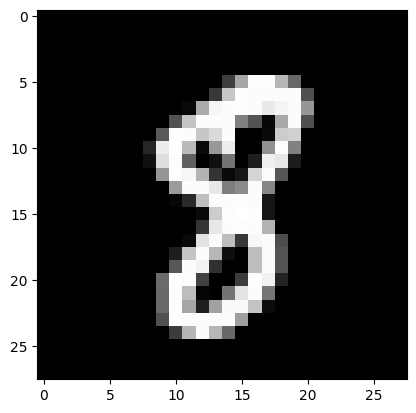

Prediction:  [8]
Label:  8


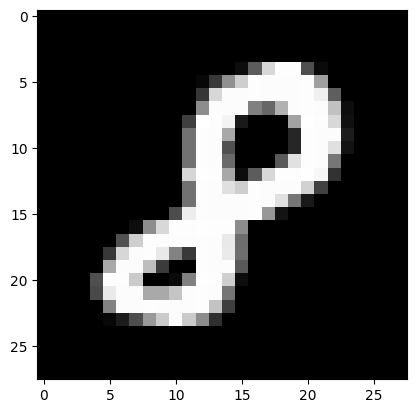

In [11]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(999, W1, b1, W2, b2)
test_prediction(10, W1, b1, W2, b2)
test_prediction(22, W1, b1, W2, b2)
test_prediction(31, W1, b1, W2, b2)
test_prediction(99, W1, b1, W2, b2)